<a href="https://colab.research.google.com/github/eponicall/stats306-winter2021/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STATS 306 WI 2021, HW 4, _20 points_

Assigned: 03/18/2021

Due: 03/26/2021  
For full credit, your canvas upload needs to occur by 3:00 am EST on 03/27/2021.

### Instructions

* Before you submit the problem set, make sure everything runs as expected. Go to the menu bar at the top of Jupyter Notebook and click `Kernel > Restart & Run All` . Equivalently in Colab, `Runtime > Restart & Run All`. Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

* Each problem has their own answer cell. Depending on the problem, the answer cell is a Markdown cell (to type text answers) or a Code cell (to type R code). Please write your answer in the designated cell. If you want to add addtional cells make sure to add them just below the designated cell.

* After you done with running your code, use `Ctrl` or `⌘` + `p` then click `save as pdf` to save your homework as pdf file. Do not use pdf exporter feature of jupyter! You are not going to upload your `.ipynb` file, we just need the `.pdf`. It is your responsibility to ensure that your answers are clearly visible in the pdf file you upload to Canvas.

* Use Slack `#hw4` channel to discuss the problems and ask for clarifications. **But please be careful not to post an answer or part of an answer**. Doing so may result in loss of points and/or disqualification from submitting the homework.

* **Late submissions will not be accepted** (unless there is a documented emergency).

### Required Packages

In [28]:
library(tidyverse)
library(stringr)

### Problem 1, _5 points_

**(1)** Create the following tibble using `tribble()`. You don't have to assign the created tibble to any variable. _1 point_

```
# A tibble: 6 x 2
  time_zone UTC_offset
  <chr>          <dbl>
1 HST              -10
2 AKST              -9
3 PST               -8
4 MST               -7
5 CST               -6
6 EST               -5
```

In [29]:
tribble(
  ~time_zone,~UTC_offset,
#----|--
"HST",-10,
"AKST",-9,
"PST",-8,
"MST",-7,
"CST",-6,
"EST",-5)

time_zone,UTC_offset
<chr>,<dbl>
HST,-10
AKST,-9
PST,-8
MST,-7
CST,-6
EST,-5


**(2)** We have defined two vectors below, one with names of 9 countries and another with their time zone names.

In [30]:
# DO NOT EDIT THIS CELL

country <- c("Italy", "Greece", "Turkey", "Mauritius", "Pakistan", "Bangladesh", "Thailand", "Singapore", "Japan")
time_zone <- c("CET", "EET", "TRT", "MUT", "PKT", "BST", "THA", "SST", "JST")

Use the `tibble()` command to create the following tibble:
```
# A tibble: 9 x 3
  country    time_zone UTC_offset
  <chr>      <chr>          <int>
1 Italy      CET                1
2 Greece     EET                2
3 Turkey     TRT                3
4 Mauritius  MUT                4
5 Pakistan   PKT                5
6 Bangladesh BST                6
7 Thailand   THA                7
8 Singapore  SST                8
9 Japan      JST                9
```
Note that the contents of the first two columns have to be pulled from the two vectors defined above whereas the third column has to be created by you directly. Again, you just need to create the tibble, not assign it to any variable. _2 points_

In [31]:
tibble(
    country=country,
    time_zone=time_zone,
    UTC_offset=1:9
)

country,time_zone,UTC_offset
<chr>,<chr>,<int>
Italy,CET,1
Greece,EET,2
Turkey,TRT,3
Mauritius,MUT,4
Pakistan,PKT,5
Bangladesh,BST,6
Thailand,THA,7
Singapore,SST,8
Japan,JST,9


**(3)** All the time zones that STATS 306 students posted in the `#time-zones` slack channel are stored in a file at this URL:

In [32]:
# DO NOT EDIT THIS CELL

tz_url <- 'https://raw.githubusercontent.com/ambujtewari/stats306-winter2021/main/data/all_tz.csv'

Import data in this file using `read_csv` into a tibble `tz`. Make sure to display the first few rows of the tibble using the `head()` command and ensure that it has one column named `UTC_offset`. _1 point_

In [33]:
tz<-read.csv(url(tz_url))
head(tz)

,UTC_offset
,<dbl>
1,-5
2,-5
3,-5
4,-5
5,-5
6,-5


**(4)** Using the `tz` tibble above, make a bar chart of UTC offsets of the time zones of STATS 306 students this semester. _1 point_

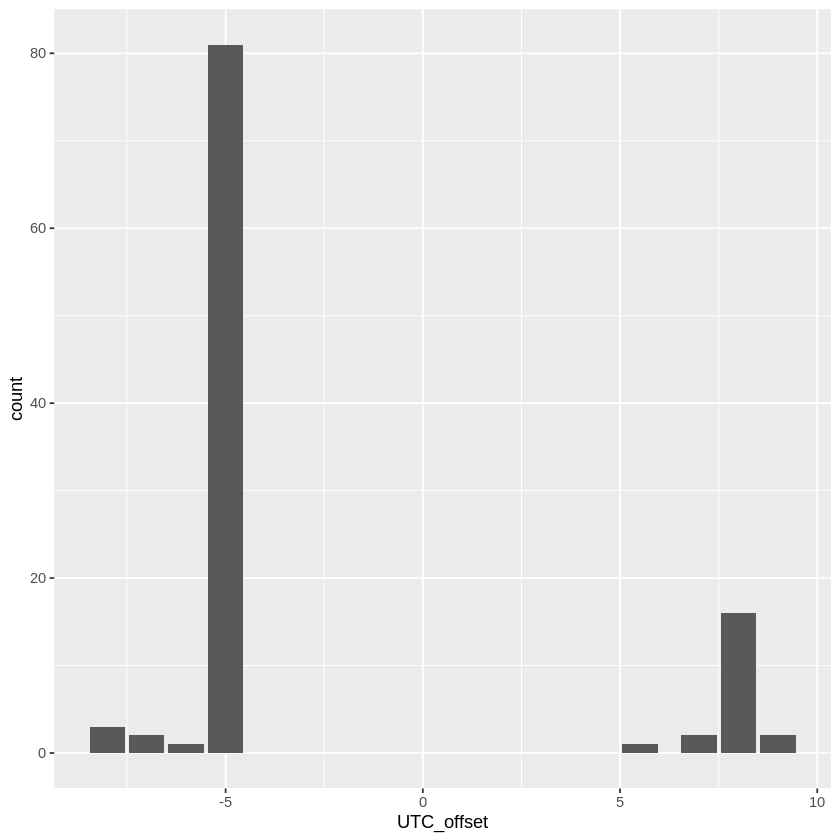

In [34]:
tz%>%
  ggplot()+geom_bar(mapping=aes(UTC_offset))

### Problem 2, _5 points_

**(1)** The average life expectancies of countries for various years are stored in a file at the URL below:

In [35]:
# DO NOT EDIT THIS CELL

life_url <- 'https://raw.githubusercontent.com/ambujtewari/stats306-winter2021/main/data/life_expectancy_years.csv'

Import the file and keep only the columns `country` and `2010` through `2021`. Then use `pivot_longer` to move the years in a column called `year` and the values into a column named `life_expectancy`. Additionally, change the `year` column to be of type integer using `as.integer()`. This final tibble, which is in tidy format, should be stored in a variable named `life`. Make sure to display the first few rows of `life` using `head()`. _4 points_

In [36]:
life<-read.csv(url(life_url))
life<-life%>%
  select(country,X2010:X2021)%>%
  pivot_longer(c(X2010:X2021),names_to="year",values_to="life_expectancy")%>%
  mutate(year = as.integer(str_replace(year, "X", "")))
head(life)

country,year,life_expectancy
<chr>,<int>,<dbl>
Afghanistan,2010,59.9
Afghanistan,2011,60.4
Afghanistan,2012,60.8
Afghanistan,2013,61.3
Afghanistan,2014,61.2
Afghanistan,2015,61.2


**(2)** Using `life` as a starting point, create a line plot (using `geom_line()`) of `life_expectancy` on the y-axis versus `year` on the x-axis for Canada, United States, and Mexico. Make sure each country's line is in a different color. _1 point_

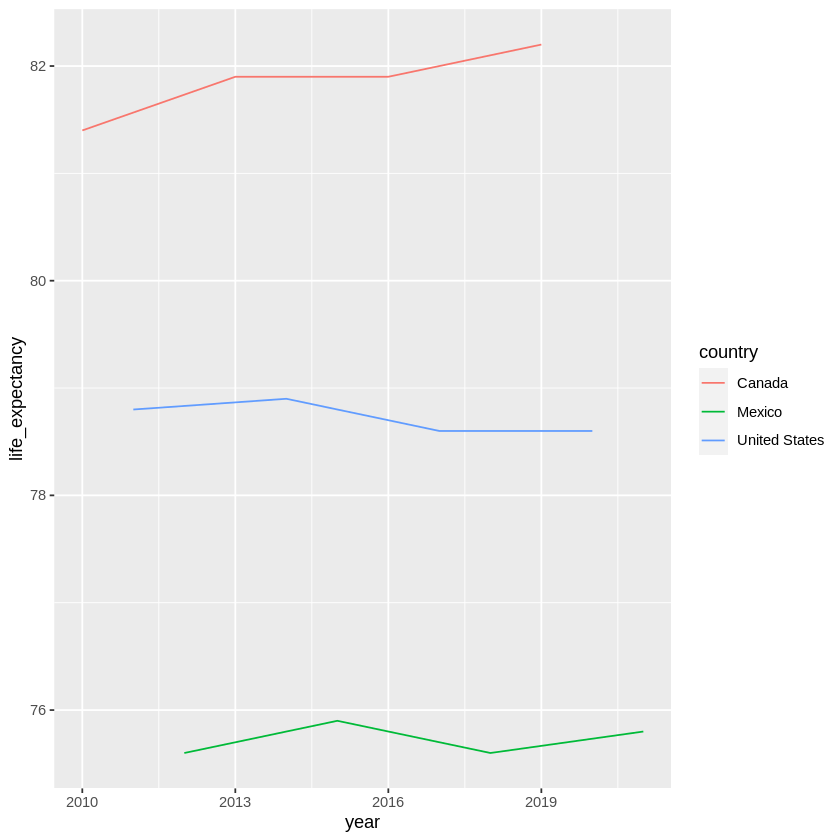

In [37]:
life%>%
  filter(country==c("Canada","United States","Mexico"))%>%
  ggplot()+geom_line(mapping=aes(x=year,y=life_expectancy,color=country))

### Problem 3, _5 points_

**(1)** Let us use the `life` tibble from the previous problem again. Using a single chain of piped commands, create a vector (not a tibble) `has_missing` that contains the names of the countries with at least one missing value for `life_expectancy`. Your command should manipulate tibbles all the way to the end where you should extract exactly one column from the tibble as a vector and store the result in the variable `has_missing`. _3 points_

In [38]:

  has_missing<-life%>%
    filter(is.na(life_expectancy))%>%
    pivot_wider(names_from=year,values_from=life_expectancy)%>%
    .$country


The code below ensures that the vector `has_missing` gets displayed for grading purposes. Don't change it!

In [39]:
# DO NOT EDIT THIS CELL

has_missing

[1] "Andorra"          "Dominica"         "Marshall Islands"

**(2)** For all countries in `has_missing`, fill in the missing values using tbe last observation carry forward method. Then create a line plot using `geom_line` with `year` on x-axis, `life_expectancy` on y-axis. Make sure the lines representing data from the different countries are in different colors. _2 points_

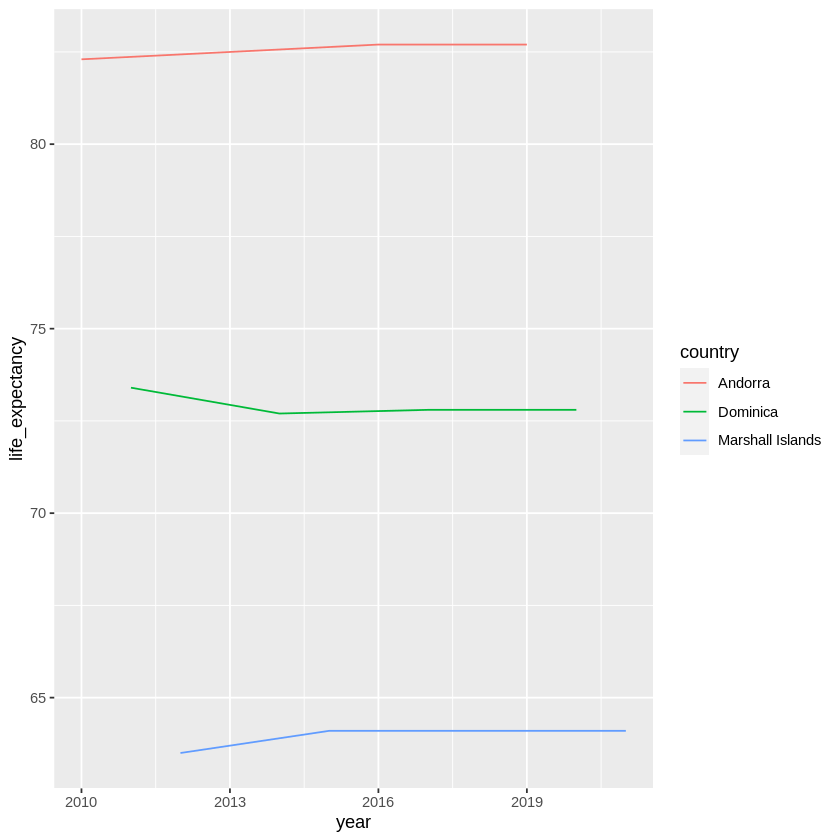

In [40]:
life%>%
  filter(country==c("Andorra","Dominica","Marshall Islands"))%>%
  fill(life_expectancy)%>%
  ggplot()+geom_line(mapping=aes(x=year,y=life_expectancy,color=country))




### Problem 4, _5 points_

**(1)** Create a string and assign to the variable `cat` such that `writeLines(cat)` displays the following: _2 points_
```
  |\_/|
 / 0 0 \
( > o < )
 '>>x<<'
 /  "  \
```

In [41]:
cat<-c("  |\\_/|"," / 0 0 \\","( > o < )"," '>>x<<'"," /  \"  \\")

In [42]:
# DO NOT EDIT THIS CELL

writeLines(cat)

  |\_/|
 / 0 0 \
( > o < )
 '>>x<<'
 /  "  \


**(2)** Create a tibble using `tribble()` called `stat_courses` that prints as follows: _1 point_
```
# A tibble: 14 x 2
   course_number course_name                 
   <chr>         <chr>                       
 1 206           Intro Data Science          
 2 250           Intro Stat and Data Analysis
 3 306           Statistical Computing       
 4 401           Applied Stat Methods II     
 5 406           Computational Methods       
 6 412           Intro Prob Stat             
 7 413           Applied Regression          
 8 415           Data Mining                 
 9 425           Intro Probability           
10 426           Intro to Theo Stat          
11 430           Applied Probability         
12 449           Topics in Biostat           
13 480           Survey Sampling             
14 485           Capstone Seminar         
```

In [43]:
stat_courses<-tribble(~course_number, ~course_name,
#---|-----------
"206","Intro Data Science",
"250","Intro Stat and Data Analysis",
"306","Statistical Computing",
"401","Applied Stat Methods II",
"406","Computational Methods",
"412","Intro Prob Stat",
"413","Applied Regression",
"415","Data Mining",
"425","Intro Probability",
"426","Intro to Theo Stat",
"430","Applied Probability",
"449","Topics in Biostat",
"480","Survey Sampling",
"485","Capstone Seminar")

In [44]:
# DO NOT EDIT THIS CELL

stat_courses

course_number,course_name
<chr>,<chr>
206,Intro Data Science
250,Intro Stat and Data Analysis
306,Statistical Computing
401,Applied Stat Methods II
406,Computational Methods
412,Intro Prob Stat
413,Applied Regression
415,Data Mining
425,Intro Probability


**(3)** Change the column `course_number` so that the prefix `"STATS "` gets added to each course number. After this change, the tibble `stat_courses` should print as follows: _1 point_
``` 
# A tibble: 14 x 2
   course_number course_name                 
   <chr>         <chr>                       
 1 STATS 206     Intro Data Science          
 2 STATS 250     Intro Stat and Data Analysis
 3 STATS 306     Statistical Computing       
 4 STATS 401     Applied Stat Methods II     
 5 STATS 406     Computational Methods       
 6 STATS 412     Intro Prob Stat             
 7 STATS 413     Applied Regression          
 8 STATS 415     Data Mining                 
 9 STATS 425     Intro Probability           
10 STATS 426     Intro to Theo Stat          
11 STATS 430     Applied Probability         
12 STATS 449     Topics in Biostat           
13 STATS 480     Survey Sampling             
14 STATS 485     Capstone Seminar      
```

In [45]:
stat_courses<-stat_courses%>%
  mutate(course_number=str_c("STATS", course_number,sep=" "))

In [46]:
 # DO NOT EDIT THIS CELL

stat_courses

course_number,course_name
<chr>,<chr>
STATS 206,Intro Data Science
STATS 250,Intro Stat and Data Analysis
STATS 306,Statistical Computing
STATS 401,Applied Stat Methods II
STATS 406,Computational Methods
STATS 412,Intro Prob Stat
STATS 413,Applied Regression
STATS 415,Data Mining
STATS 425,Intro Probability


**(4)** Create a string and assign to the variable `drseuss` such that `writeLines(drseuss)` displays the following: _1 point_
```
"You're off to Great Places!
  Today is your day!
   Your mountain is waiting,
    So... get on your way!"
-Dr. Seuss, Oh, the Places You'll Go!
```

In [47]:
drseuss<-"\"You're off to Great Places!\n\tToday is your day!\n\t\tYour mountain is waiting,\n\t\t\tSo...get on your way!\"\n-Dr. Seuss, Oh, the Places You'll Go!"

In [48]:
# DO NOT EDIT THIS CELL

writeLines(drseuss)

"You're off to Great Places!
	Today is your day!
		Your mountain is waiting,
			So...get on your way!"
-Dr. Seuss, Oh, the Places You'll Go!
